# Adult Data Set Analysis

Data Source: Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Adult

## Problem statement

The dataset contains 15 columns

- 1 target variable: <b>Income</b>. The income is divide into two classes: <=50K and >50K
- 14 input variables. These are the demographics and other features to describe a person

The task is to predict if an individual's annual income excceds $50,000 based on census data. We can explore the possibility in predicting income level based on the individual’s personal information.

## Table of contents

Below are my steps for this final project:

1. [Import data](#1.-Import-data)
2. [Data cleaning / data quality check](#2.-Data-cleaning-/-data-quality-check)
3. [EDA](#3.-EDA)
4. [Feature engineering](#4.-Feature-engineering)
5. [Model](#5.-Model)

## Executive summary

- Data cleaning

I have checked in this dataset there are no null values and the ranges of the variables seem reasonable. However there are some `?` in these 3 columns - `workclass`, `occupation`, `native-country`. So I filled these `?` with the most frequent elements of each columns.

- EDA

I have plotted the correlation heatmap, distribution charts for each variable (both numerical and categorical variables), and boxplots to learn more about how does the data look like.

- Feature engineering

In order to reduce number of elements when generating dummy attributes for categorical variables, I have combined several elements for some columns (e.g. put several `native-country` into same continent or region; aggregate `capital-gain` and `capital-loss`). Also, I transformed the target variable (`>50K` & < `<=50K`) into binary variable (`1` & `0`).

- Modeling

I have created two models to predict income levels
1. Logistic regression - either it is >50K (target:1) or <=50K (target:0). The accuracy of this model is 0.80, and the AUC for the ROC is 0.59.
2. Decision tree - The accuracy of this model is 0.85, and the AUC for the ROC is 0.75.

---------

## Analysis & modeling

### 1. Import data

Income above or below 50k

Source: https://archive.ics.uci.edu/ml/datasets/Adult

Notes: 
* Watch out for some missing data coded as "?"
* fnlwgt is the weight given to a type of observation based on the sampling method; this is explained more in the [data documentation](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names); you can feel free to ignore it if it doesn't make sense

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
income = pd.read_csv('income.csv')

In [3]:
# get first 3 rows of this dataset
income.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,more-or-less-than-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
# number of rows and columns
income.shape

(32561, 15)

We have 32561 observations and 15 variables (14 input variables and 1 target variable).

### 2. Data cleaning / data quality check

In [5]:
# check how many null values in each column
income.isnull().sum()

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
more-or-less-than-50k    0
dtype: int64

There are no null values in each column.

In [6]:
# check how many '?' values in each column
income.isin([' ?']).sum()

age                         0
workclass                1836
fnlwgt                      0
education                   0
education-num               0
marital-status              0
occupation               1843
relationship                0
race                        0
sex                         0
capital-gain                0
capital-loss                0
hours-per-week              0
native-country            583
more-or-less-than-50k       0
dtype: int64

There are `?` in these 3 columns: `workclass`, `occupation`, and `native-country`.

In [7]:
# replace '?' with null values
income.replace(' ?', np.NaN, inplace=True)

# replace null values with the most frequent element of each column
income['workclass'].fillna(income['workclass'].mode()[0], inplace=True)
income['occupation'].fillna(income['occupation'].mode()[0], inplace=True)
income['native-country'].fillna(income['native-country'].mode()[0], inplace=True)   

# check if there are any null values or '?' in the dataset
# should be all zeros
print(income.isnull().sum())
print(income.isin([' ?']).sum())

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
more-or-less-than-50k    0
dtype: int64
age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
more-or-less-than-50k    0
dtype: int64


In [8]:
# Column type overview
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32561 non-null  int64 
 1   workclass              32561 non-null  object
 2   fnlwgt                 32561 non-null  int64 
 3   education              32561 non-null  object
 4   education-num          32561 non-null  int64 
 5   marital-status         32561 non-null  object
 6   occupation             32561 non-null  object
 7   relationship           32561 non-null  object
 8   race                   32561 non-null  object
 9   sex                    32561 non-null  object
 10  capital-gain           32561 non-null  int64 
 11  capital-loss           32561 non-null  int64 
 12  hours-per-week         32561 non-null  int64 
 13  native-country         32561 non-null  object
 14  more-or-less-than-50k  32561 non-null  object
dtypes: int64(6), object

In [9]:
# get summary statistics for numerical variables
income[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']].describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


#### Summary of numerical variables:

Age
- The mean value is 38.
- The value of `age` ranges from 17 to 90.
- IQR = Q3-Q1 = 20. The upper bound of outlier is Q3 + (1.5 * IQR)= 78. The lower bound of outlier is Q1 - (1.5 * IQR)= -2.
- There are outliers in `age`.

Capital gain
- The mean value is 1077.65.
- The value of `capital-gain` ranges from 0 to 99999.
- IQR = 0. The upper bound of outlier is Q3 + (1.5 * IQR)= 0. The lower bound of outlier is Q1 - (1.5 * IQR)= 0.
- There are outliers in `capital-gain`.

Capital loss
- The mean value is 87.30.
- The value of `capital-loss` ranges from 0 to 4356.
- IQR = 0. The upper bound of outlier is Q3 + (1.5 * IQR)= 0. The lower bound of outlier is Q1 - (1.5 * IQR)= 0.
- There are outliers in `capital-loss`.

Hours per week
- The mean value is 40.44.
- The value of `hours-per-week` ranges from 1 to 99.
- IQR = 5. The upper bound of outlier is Q3 + (1.5 * IQR)= 52.5. The lower bound of outlier is Q1 - (1.5 * IQR)= 32.5.
- There are outliers in `hours-per-week`.

In [10]:
# get counts for categorical variables
income.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,more-or-less-than-50k
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


#### Summary of categorical variables

Workclass
- There are 8 different workclasses.
- `workclass` is biased to `private`, accounting for 75.3%.

Education
- There are 16 different education levels.

Marital status
- There are 7 different marital status.
- The most frequent element is `Married-civ-spouse`, with percentage 46.0%.

Occupation
- There are 14 different occupation categories.
- The most frequent element is `Prof-specialty`, with percentage 18.4%.
- Compared to other variables, `occupation` has uniform distribution of categories.

Relationship
- There are 6 different relationship categories.
- The most frequent element is `Husband`, with percentage 40.5%.

Race
- There are 5 different races.
- `race` is biased to white race, accounting for 85.4%

Sex
- 67% are males, and 33% are females.

Native country
- There are 41 different countries - maximum number of unique elements
- `native-country` is biased toward United Stats (accounts for 91.4%)

### 3. EDA

#### 3-1. Correlation heatmap

<AxesSubplot:>

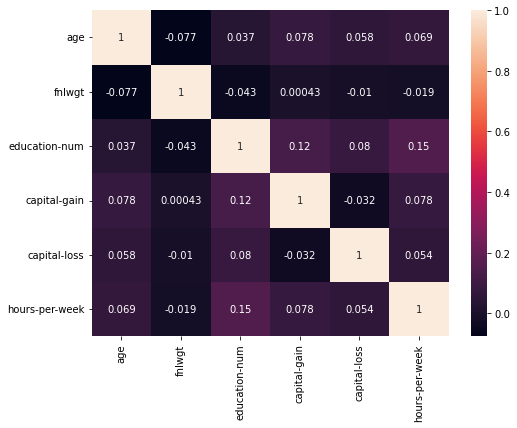

In [11]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(income.corr(), annot=True)

#### 3-2. Distribution (histogram & bar chat)

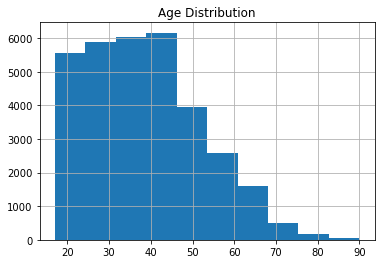

In [12]:
# Distribution of Age
income['age'].hist()
plt.title('Age Distribution')
plt.show()

`age` is not symmetric, it is right-skewed.

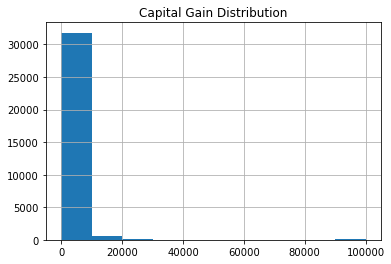

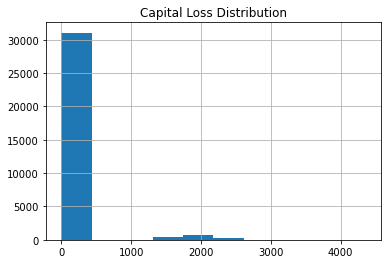

In [13]:
# Distribution of Capital Gain and Capital Loss
income['capital-gain'].hist()
plt.title('Capital Gain Distribution')
plt.show()

income['capital-loss'].hist()
plt.title('Capital Loss Distribution')
plt.show()

Most people have no capital gain or loss.

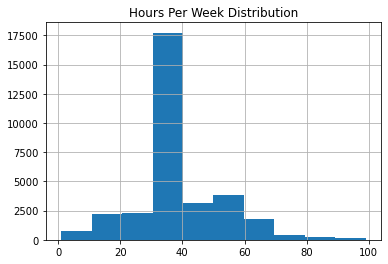

In [14]:
# Distribution of Hours Per Week
income['hours-per-week'].hist()
plt.title('Hours Per Week Distribution')
plt.show()

In [15]:
# numerator: counts of who works between 30-40 hours per week
# denominator: total population
(income[income['hours-per-week']<=40].shape[0] - income[income['hours-per-week']<30].shape[0]) / income.shape[0]

0.5799576180092749

Most people (roughly 58%) work 30-40 hours per week.

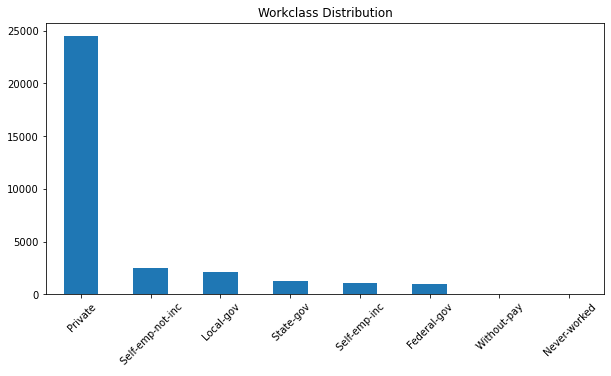

In [16]:
# Distribution of Workclass
plt.figure(figsize=(10,5))
income['workclass'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Workclass Distribution')
plt.show()

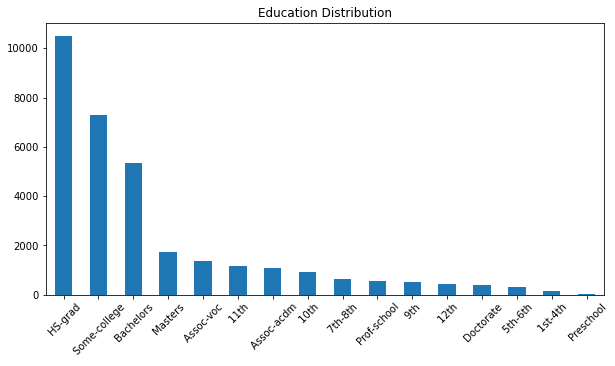

In [17]:
# Distribution of Education
plt.figure(figsize=(10,5))
income['education'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Education Distribution')
plt.show()

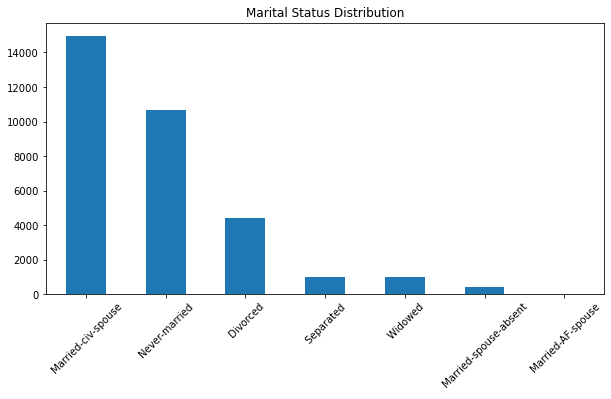

In [18]:
# Distribution of Marital Status
plt.figure(figsize=(10,5))
income['marital-status'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.show()

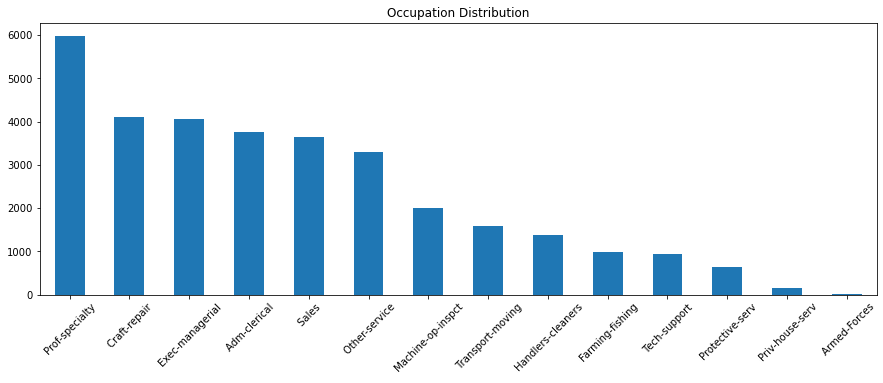

In [19]:
# Distribution of Occupation
plt.figure(figsize=(15,5))
income['occupation'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Occupation Distribution')
plt.show()

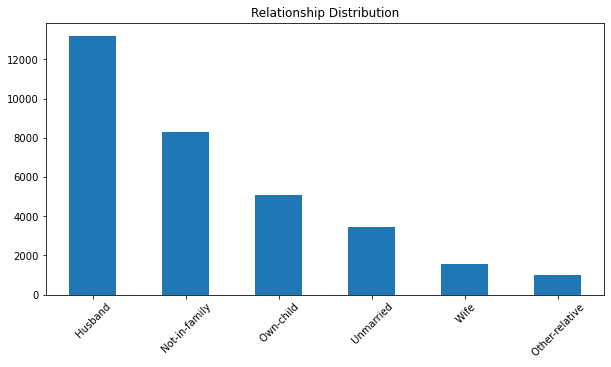

In [20]:
# Distribution of Relationship
plt.figure(figsize=(10,5))
income['relationship'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Relationship Distribution')
plt.show()

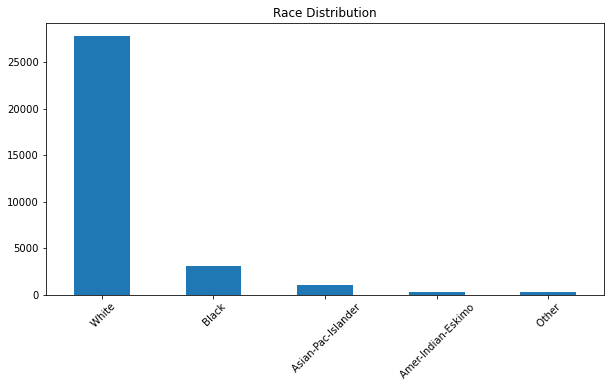

In [21]:
# Distribution of Race
plt.figure(figsize=(10,5))
income['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Race Distribution')
plt.show()

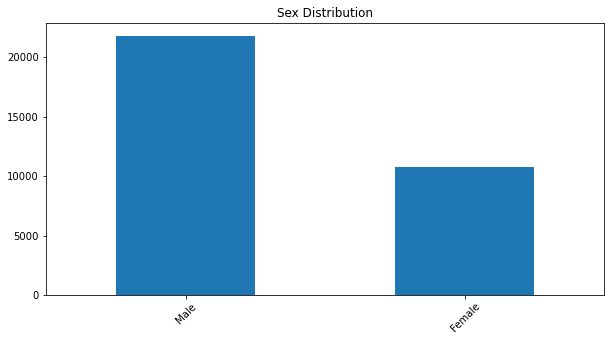

In [22]:
# Distribution of Sex
plt.figure(figsize=(10,5))
income['sex'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Sex Distribution')
plt.show()

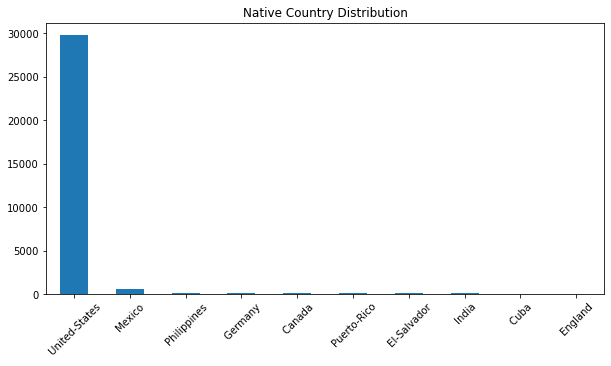

In [23]:
# Distribution of Native Country
# as there are too many countries, here only select top 10 countries for plotting
plt.figure(figsize=(10,5))
income['native-country'].value_counts().nlargest(10).plot(kind='bar') 
plt.xticks(rotation=45)
plt.title('Native Country Distribution')
plt.show()

#### 3-3. Boxplot

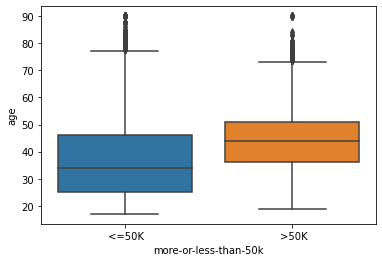

In [24]:
# Age boxplot by income group
sns.boxplot(x='more-or-less-than-50k', y='age', data=income)
plt.show()

In general, income group >50k is older than income group <=50k.

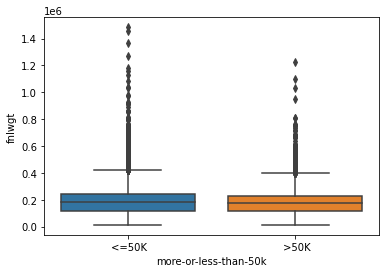

In [25]:
# fnlwgt boxplot by income group
sns.boxplot(x='more-or-less-than-50k', y='fnlwgt', data=income)
plt.show()

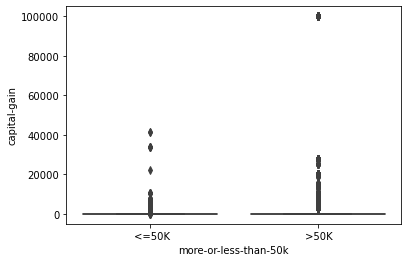

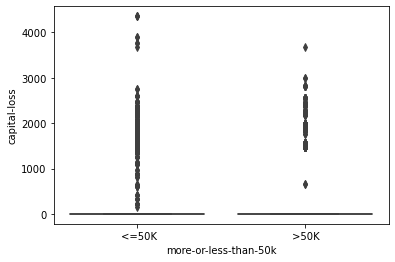

In [26]:
# Capital gain boxplot by income group
sns.boxplot(x='more-or-less-than-50k', y='capital-gain', data=income)
plt.show()

# Capital loss boxplot by income group
sns.boxplot(x='more-or-less-than-50k', y='capital-loss', data=income)
plt.show()

In general, income group >50k has higher capital gain, and income group <=50k has higher capital loss.

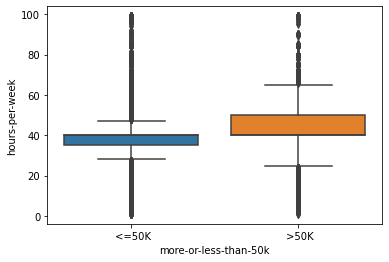

In [27]:
# Hours per week boxplot by income group
sns.boxplot(x='more-or-less-than-50k', y='hours-per-week', data=income)
plt.show()

In general, income group >50k works longer than income group <=50k.

### 4. Feature engineering

#### Reduce number of elements of `workclass`
- `Not working`: 'Never-worked', 'Without-pay'
- `Other gov`: 'State-gov', 'Local-gov'
- `Self employed`: 'Self-emp-not-inc', 'Self-emp-inc'

In [28]:
income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [29]:
# create new column combining workclasses

# new workclass definitions
Not_working = [' Never-worked', ' Without-pay']
Other_gov = [' State-gov', ' Local-gov']
Self_employed = [' Self-emp-not-inc', ' Self-emp-inc']

def workclass(row):
    if row['workclass'] in Not_working:
        return ' Not-working'
    elif row['workclass'] in Other_gov:
        return ' Other-gov'
    elif row['workclass'] in Self_employed:
        return ' Self-employed'
    else:
        return row['workclass']

In [30]:
income['workclass'] = income.apply(workclass, axis=1)
income['workclass'].value_counts()

 Private          24532
 Self-employed     3657
 Other-gov         3391
 Federal-gov        960
 Not-working         21
Name: workclass, dtype: int64

#### Reduce number of elements of `education`
- `Dropout`: 'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'
- `Associate`: 'Assoc-acdm', 'Assoc-voc'
- `HS`: 'HS-grad', 'Some-college'

In [31]:
income['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [32]:
# create new column combining education levels

# new education definitions
Dropout = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']
Associate = [' Assoc-acdm', ' Assoc-voc']
HS = [' HS-grad', ' Some-college']

def edu(row):
    if row['education'] in Dropout:
        return ' Dropout'
    elif row['education'] in Associate:
        return ' Associate'
    elif row['education'] in HS:
        return ' HS'
    else:
        return row['education']

In [33]:
income['education'] = income.apply(edu, axis=1)
income['education'].value_counts()

 HS             17792
 Bachelors       5355
 Dropout         4253
 Associate       2449
 Masters         1723
 Prof-school      576
 Doctorate        413
Name: education, dtype: int64

#### Reduce number of elements of `relationship`
- `Married`: 'Husband', 'Wife'
- `Unmarried`: 'Unmarried', 'Not-in-family'

In [34]:
income['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [35]:
# create new column combining marital status

# new marital status definitions
Married = [' Married-civ-spouse', ' Married-AF-spouse']
Not_married = [' Divorced', ' Separated', ' Married-spouse-absent']

def marital(row):
    if row['marital-status'] in Married:
        return ' Married'
    elif row['marital-status'] in Not_married:
        return ' Not-married'
    else:
        return row['marital-status']

In [36]:
income['marital-status'] = income.apply(marital, axis=1)
income['marital-status'].value_counts()

 Married          14999
 Never-married    10683
 Not-married       5886
 Widowed            993
Name: marital-status, dtype: int64

#### Reduce number of elements of `native-country`

In [37]:
income['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [38]:
# create new column combining native countries

# new native country definitions
Latin_America = [' Mexico', ' Puerto-Rico', ' El-Salvador', ' Cuba', ' Jamaica', ' Dominican-Republic', ' Haiti', ' Guatemala', ' Nicaragua', ' Ecuador', ' Honduras', ' Peru', ' Trinadad&Tobago', ' Columbia']
SE_Asia = [' Philippines', ' Vietnam', ' Laos', ' Thailand', ' Cambodia']
East_Asia = [' China', ' Japan', ' Taiwan', ' Hong']
South_Asia = [' India', ' Iran']
Western_Europe = [' Germany', ' France', ' Holand-Netherlands', ' England', ' Ireland', ' Scotland']
Southern_Europe = [' Italy', ' Greece', ' Portugal']
CE_Europe = [' Poland', ' Hungary', ' Yugoslavia']
United_States = [' United-States', ' Outlying-US(Guam-USVI-etc)']
North_America = [' Canada']
Others = [' South']

def native(row):
    if row['native-country'] in Latin_America:
        return ' Latin-America'
    elif row['native-country'] in SE_Asia:
        return ' SE-Asia'
    elif row['native-country'] in East_Asia:
        return ' East-Asia'
    elif row['native-country'] in South_Asia:
        return ' South-Asia'
    elif row['native-country'] in Western_Europe:
        return ' Western-Europe'
    elif row['native-country'] in Southern_Europe:
        return ' Southern-Europe'
    elif row['native-country'] in CE_Europe:
        return ' CE-Europe'
    elif row['native-country'] in United_States:
        return ' United-States'
    elif row['native-country'] in North_America:
        return ' North-America'
    elif row['native-country'] in Others:
        return ' Others'
    else:
        return row['native-country']

In [39]:
income['native-country'] = income.apply(native, axis=1)
income['native-country'].value_counts()

 United-States      29767
 Latin-America       1401
 SE-Asia              320
 Western-Europe       293
 East-Asia            208
 South-Asia           143
 Southern-Europe      139
 North-America        121
 CE-Europe             89
 Others                80
Name: native-country, dtype: int64

#### Combine `capital-gain` and `capital-loss` variables

In [40]:
# make capital loss into negative figures
# therefore, capital gains are positive and capital losses are negative
income['capital-loss'] = income['capital-loss']*-1
income['capital-loss'].describe()

count    32561.000000
mean       -87.303830
std        402.960219
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: capital-loss, dtype: float64

In [41]:
# create new column combining capital-gain and capital-loss
def capital(row):
    # if there is capital gain, then return capital gain
    if row['capital-gain'] != 0:
        return row['capital-gain']
    # else return capital loss (including both capital gain = 0 and capital loss = 0 scenario)
    else:
        return row['capital-loss']

In [42]:
income["capital-gain-loss"] = income.apply(capital, axis=1)
income["capital-gain-loss"].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain-loss, dtype: float64

#### Create dummy attributes for categorical variables

In [43]:
# Create X: input variables
X = income.drop(['more-or-less-than-50k','education-num'],axis=1)

# Create dummy for categorical variables
X_encoded = pd.get_dummies(X,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
X_encoded

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,capital-gain-loss,workclass_ Federal-gov,workclass_ Not-working,workclass_ Other-gov,workclass_ Private,...,native-country_ CE-Europe,native-country_ East-Asia,native-country_ Latin-America,native-country_ North-America,native-country_ Others,native-country_ SE-Asia,native-country_ South-Asia,native-country_ Southern-Europe,native-country_ United-States,native-country_ Western-Europe
0,39,77516,2174,0,40,2174,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32557,40,154374,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32558,58,151910,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32559,22,201490,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Create binary target variable: 
- `<=50K`: 0
- `>50K`: 1

In [44]:
# create binary target variable: <=50K: 0; >50K: 1
income['target'] = income['more-or-less-than-50k'].map({' <=50K': 0, ' >50K': 1})
income['target'].mean()

0.2408095574460244

24% of observations are categorized income group >50k, and 76% of observations are categorized income group <=50k.

### 5. Model

#### 5-1: Logistics regression model

In [45]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
# split dataset in features and target variable
X_encoded = X_encoded.drop(['capital-gain', 'capital-loss'], axis=1)
y = income['target']

In [47]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=16)

In [48]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

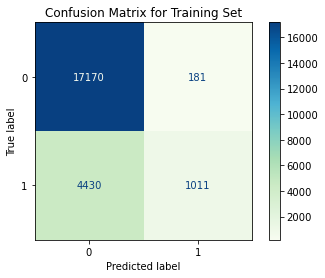

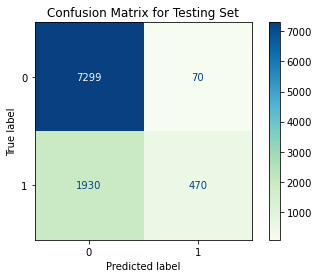

In [49]:
# Confusion matrix for training set
plot_confusion_matrix(logreg, X_train, y_train, cmap='GnBu')
plt.title('Confusion Matrix for Training Set')
plt.show()

# Confusion matrix for testing set
plot_confusion_matrix(logreg, X_test, y_test, cmap='GnBu')
plt.title('Confusion Matrix for Testing Set')
plt.show()

#### Evaluation metrics
- Precision: What proportion of positive identifications was actually correct?
- Recall: What proportion of actual positives was identified correctly?
- F1 Score: The weighted average of Precision and Recall.
- Accuracy: Describing the number of correct predictions over all predictions.

In [50]:
# evaluate the model for precision, and recall, f1-score, and accuracy
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7369
           1       0.87      0.20      0.32      2400

    accuracy                           0.80      9769
   macro avg       0.83      0.59      0.60      9769
weighted avg       0.81      0.80      0.74      9769



In [51]:
# accuracy
logreg.score(X_encoded,y)

0.7969656951567826

The accuracy of this logistic regression model is 0.80.

In [52]:
# roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.5931670398516307


The roc_auc_score of this logistic regression model is 0.59.

Note - roc_auc_score runs from 0 to 1, and is sorting predictive possibilities. 0.5 is the baseline for random guessing, so you want to always get above 0.5.

#### 5-2: Decision Tree

In [53]:
# import packages
from sklearn.tree import DecisionTreeClassifier

In [54]:
# instantiate the model
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=200,min_samples_leaf=100, max_depth=10)

# fit the model with data
dt.fit(X_train, y_train)

y_pred1 = dt.predict(X_test)

In [55]:
# evaluate the model for precision, and recall, f1-score, and accuracy
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      7369
           1       0.77      0.55      0.64      2400

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



The accuracy of this decision tree model is 0.85.

In [56]:
# roc_auc_score
print(roc_auc_score(y_test, y_pred1))

0.7468663488940156


The roc_auc_score of this decision tree is 0.75.

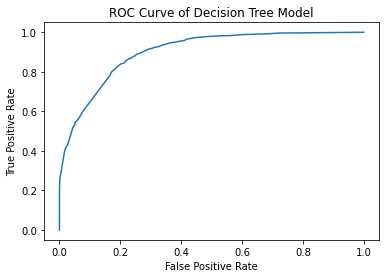

In [57]:
y_pred_proba1 = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree Model')
plt.show()

An ROC curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate & False Positive Rate. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.